# Interlude 1 - Decision trees

1. Tuning `max_leaf_nodes` for a decision tree.
2. Trees are unstable.

In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import pandas as pd
np.random.seed(123)
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [3]:
X, y = make_moons(n_samples=400, noise=0.2, random_state=42)

NameError: name 'make_moons' is not defined

In [4]:
np.take([0, 1], (y < 1))
np.take(labels, (y < 1))

NameError: name 'y' is not defined

In [11]:
from sklearn.datasets import make_moons

labels = ['b', 'r']
X, y = make_moons(n_samples=400, noise=0.2, random_state=42)
?y = np.take([0, 1], (y < 1))
y_label = np.take(labels, (y < 1))

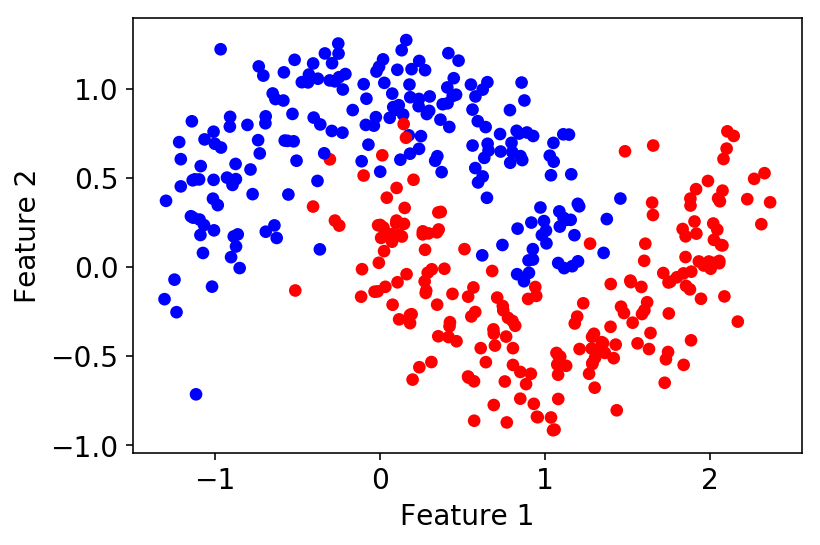

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_label, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

C:\Users\lukashch\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


FileNotFoundError: [Errno 2] No such file or directory: '../../images/dt_max_leaf_nodes_cv.png'

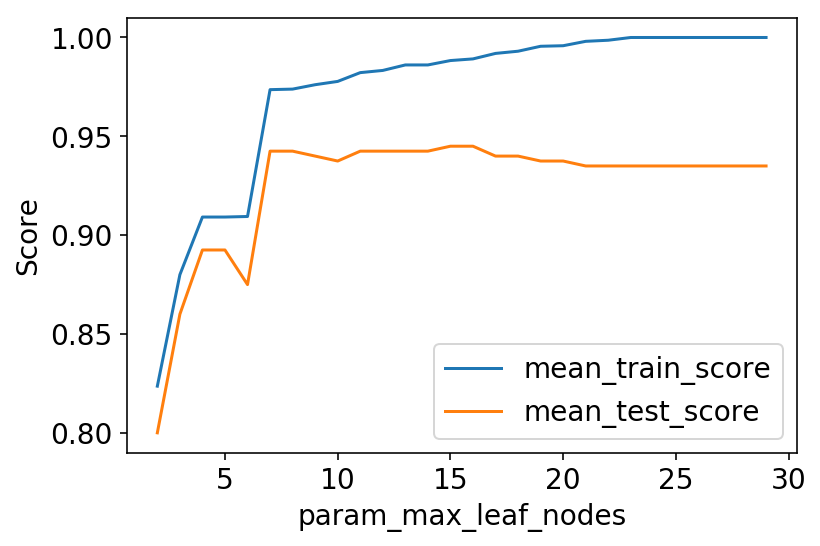

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes':range(2, 30)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid,
                    cv=10,
                    return_train_score=True,
                    #scoring='roc_auc'
                )
grid.fit(X, y)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes',
            y=['mean_train_score', 'mean_test_score'],
           )
plt.legend(loc='best')
plt.ylabel('Score');
plt.savefig('../../images/dt_max_leaf_nodes_cv.png')

Trees are unstable, refit with slightly different data and you get different tree structure. This is a sign that trees are high variance models.

In [9]:
pwd

'C:\\Users\\lukashch\\Documents\\GitHub\\advanced-comp-2018\\lecture-02'

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from utils import draw_tree


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target,
    # this line changes
    random_state=0)

tree = DecisionTreeClassifier(max_leaf_nodes=6, random_state=1).fit(X_train, y_train)

draw_tree(tree, iris.feature_names, filled=True, svg_name='../../images/dt_unstable1.svg')

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target,
    # this line changes
    random_state=1)

tree = DecisionTreeClassifier(max_leaf_nodes=6, random_state=1).fit(X_train, y_train)

#draw_tree(tree, iris.feature_names, filled=True,
#          svg_name="../../images/dt_unstable2.svg")

**Note:** some of the features are never used!

In [25]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

---

# Aside - Random forests


You can inspect the individual trees, their predictions as well as the predictions of the forest.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs


labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))


clf = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=1)
clf.fit(X[3:], y[3:])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [9]:
clf.predict_proba(X[:3,:])

array([[ 0.63416391,  0.36583609],
       [ 0.55651955,  0.44348045],
       [ 0.1013933 ,  0.8986067 ]])

In [27]:
for n, tree in zip(range(3), clf.estimators_):
    print("Prediction by tree %i\n" % n, tree.predict_proba(X[:3,:]))
    
print("... more trees here ...")
print()
print("Prediction by forest\n", clf.predict_proba(X[:3,:]))

Prediction by tree 0
 [[0.42962963 0.57037037]
 [1.         0.        ]
 [0.         1.        ]]
Prediction by tree 1
 [[0.90322581 0.09677419]
 [0.58333333 0.41666667]
 [0.28947368 0.71052632]]
Prediction by tree 2
 [[1. 0.]
 [0. 1.]
 [0. 1.]]
... more trees here ...

Prediction by forest
 [[0.63416391 0.36583609]
 [0.55651955 0.44348045]
 [0.1013933  0.8986067 ]]


**Note:** Individual trees output the class index, `RandomForestClassifier` has already translated back to class label. This is a bit confusing.

In [28]:
clf.predict(X[:3,:])

array(['b', 'b', 'r'], dtype='<U1')

In [12]:
for n, tree in enumerate(clf.estimators_):
    print("Prediction by tree %i" % n, tree.predict(X[:3,:]))
    
print("Prediction by forest", clf.predict(X[:3,:]))

Prediction by tree 0 [ 1.  0.  1.]
Prediction by tree 1 [ 0.  0.  1.]
Prediction by tree 2 [ 0.  1.  1.]
Prediction by tree 3 [ 1.  1.  1.]
Prediction by tree 4 [ 0.  0.  1.]
Prediction by tree 5 [ 0.  0.  1.]
Prediction by tree 6 [ 0.  0.  1.]
Prediction by tree 7 [ 0.  0.  1.]
Prediction by tree 8 [ 0.  1.  1.]
Prediction by tree 9 [ 0.  0.  1.]
Prediction by tree 10 [ 0.  1.  1.]
Prediction by tree 11 [ 1.  1.  1.]
Prediction by tree 12 [ 1.  0.  1.]
Prediction by tree 13 [ 0.  0.  1.]
Prediction by tree 14 [ 0.  1.  1.]
Prediction by tree 15 [ 0.  0.  1.]
Prediction by tree 16 [ 1.  1.  1.]
Prediction by tree 17 [ 1.  0.  1.]
Prediction by tree 18 [ 0.  0.  1.]
Prediction by tree 19 [ 0.  0.  1.]
Prediction by forest ['b' 'b' 'r']


Each tree outputs either a zero or a one. The forest however outputs a label (b or r). This is what is confusing. You can translate from class index to class label using:

In [13]:
clf.classes_[0]

'b'

---

# Quick stop: Gradient descent

In [59]:
def f(x, m=1.23, b=3.14):
    return m*x + b

line = np.linspace(0, 10, 100)
y = f(line)

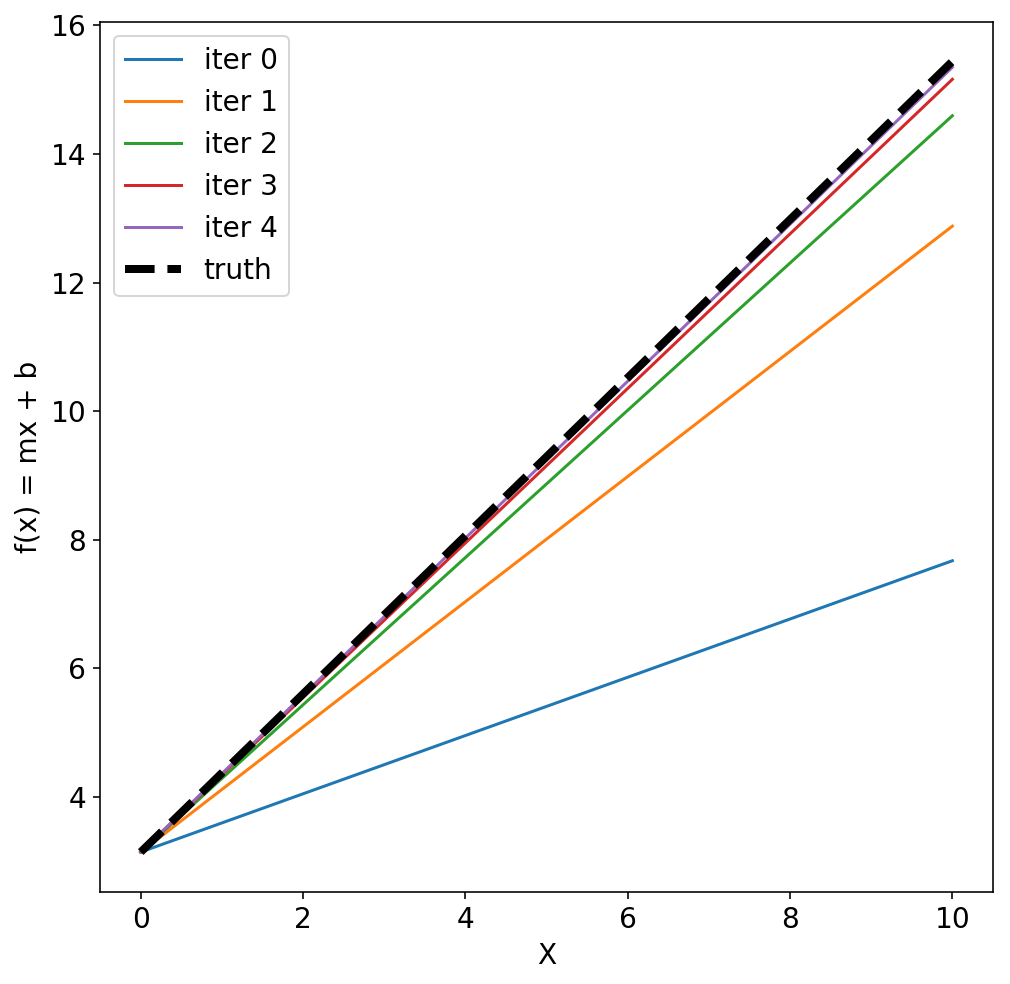

In [68]:
# our 'random' guess for m as starting point
m_hat = m_hat_orig = -1.12425
grad = lambda x, y_, m: (2*x* (f(x, m=m) - y_))

grad_ms = []

for n in range(5):    
    # compute the gradient of L wrt m
    grad_m = 0.
    for p_,y_ in zip(line, y):
        grad_m += grad(p_, y_, m_hat)
    grad_m /= len(line)
    
    # now update m_hat using our update rule
    m_hat -= 0.01 *grad_m
    grad_ms.append(0.01 *grad_m)

    y_hat = f(line, m=m_hat)
    plt.plot(line, y_hat, label='iter %i' %n);

plt.plot(line, y, 'k--', label='truth', lw=4);
plt.xlabel("X")
plt.ylabel("f(x) = mx + b")
plt.legend(loc='best');

In [63]:
print("final m_hat", m_hat)
print('m_hat = m_hat + a*g_0 + a*g_1 + a*g_2 + ... = ', m_hat_orig - sum(grad_ms))

final m_hat 1.22998308184
m_hat = m_hat + a*g_0 + a*g_1 + a*g_2 + ... =  1.22998308184


---

# Interlude 2 - Practicalities of Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from utils import plot_loss, load_wine

X, y = load_wine()

In [19]:
X[:3, :]

array([[  7.40000000e+00,   7.00000000e-01,   0.00000000e+00,
          1.90000000e+00,   7.60000000e-02,   1.10000000e+01,
          3.40000000e+01,   9.97800000e-01,   3.51000000e+00,
          5.60000000e-01,   9.40000000e+00],
       [  7.80000000e+00,   8.80000000e-01,   0.00000000e+00,
          2.60000000e+00,   9.80000000e-02,   2.50000000e+01,
          6.70000000e+01,   9.96800000e-01,   3.20000000e+00,
          6.80000000e-01,   9.80000000e+00],
       [  7.80000000e+00,   7.60000000e-01,   4.00000000e-02,
          2.30000000e+00,   9.20000000e-02,   1.50000000e+01,
          5.40000000e+01,   9.97000000e-01,   3.26000000e+00,
          6.50000000e-01,   9.80000000e+00]])

In [21]:
y[:3]

array([ 5.,  5.,  5.])

In [23]:
from collections import Counter
Counter(y)
# this could also be a classification problem instead of a regression problem

Counter({3.0: 30, 4.0: 216, 5.0: 2138, 6.0: 2836, 7.0: 1079, 8.0: 193, 9.0: 5})

In [24]:
feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                 "chlorides", "free sulfur dioxide", "total sulfur dioxide",
                 "density", "pH", "sulphates", "alcohol"]
print(feature_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


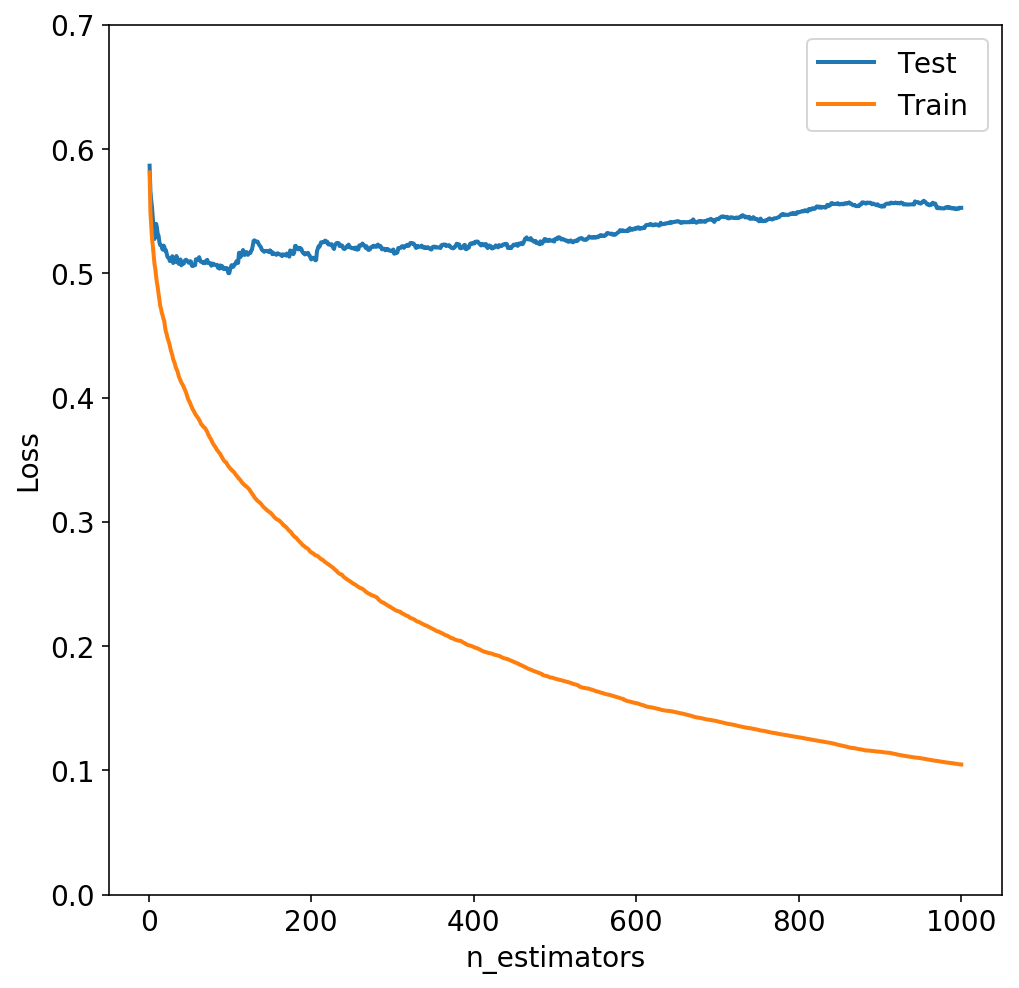

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = GradientBoostingRegressor(n_estimators=1000, max_depth=2, learning_rate=1.)
clf.fit(X_train, y_train)

_, ax = plot_loss(clf, X_test, y_test)
ax.legend(loc='best');

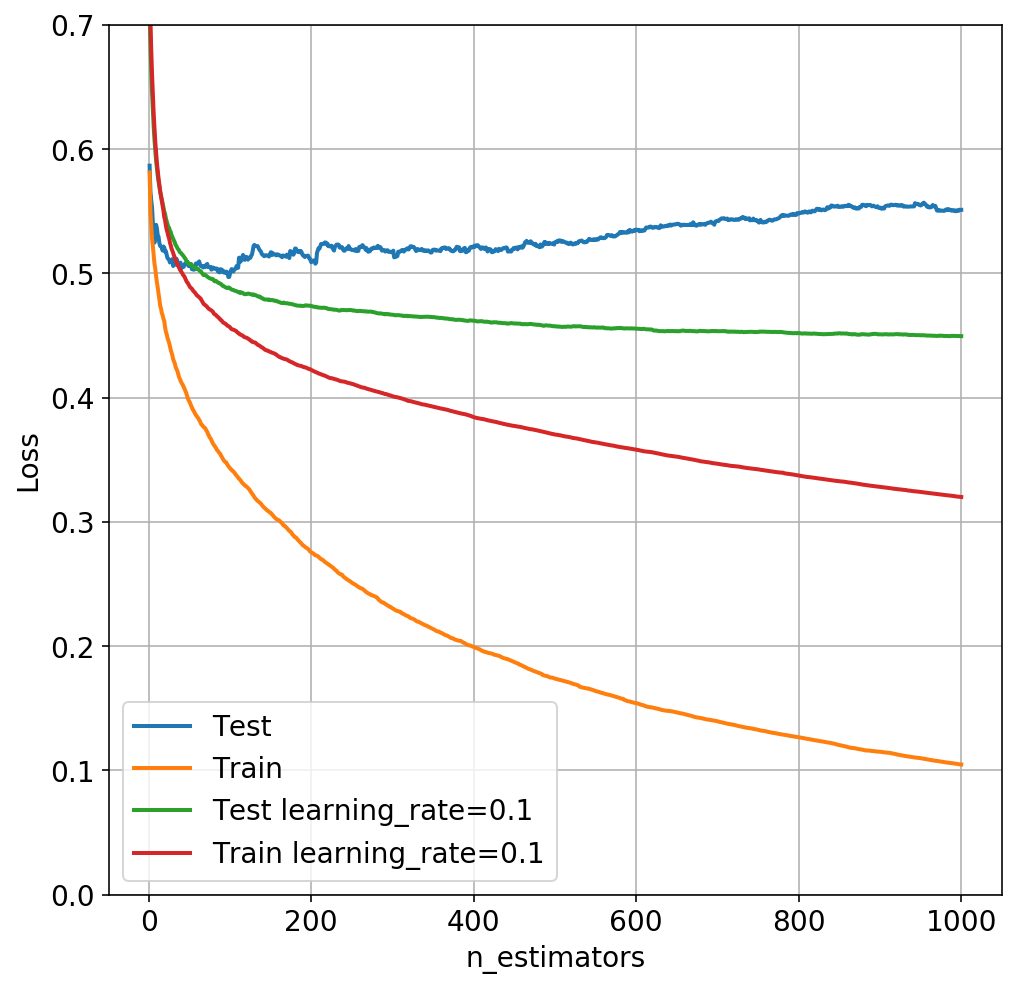

In [26]:
# shrinkage
# Slow learning by shrinking the predictions of each tree by some small scalar (learning_rate)
# A lower learning_rate requires a higher number of n_estimators

ax = plt.gca()

clf = GradientBoostingRegressor(n_estimators=1000, max_depth=2, learning_rate=1.)
clf.fit(X_train, y_train)

_, ax = plot_loss(clf, X_test, y_test, ax=ax)


clf = GradientBoostingRegressor(n_estimators=1000, max_depth=2, learning_rate=0.1)
clf.fit(X_train, y_train)

_, ax = plot_loss(clf, X_test, y_test, ax=ax, label='learning_rate=0.1')
ax.legend(loc='best')
ax.grid()

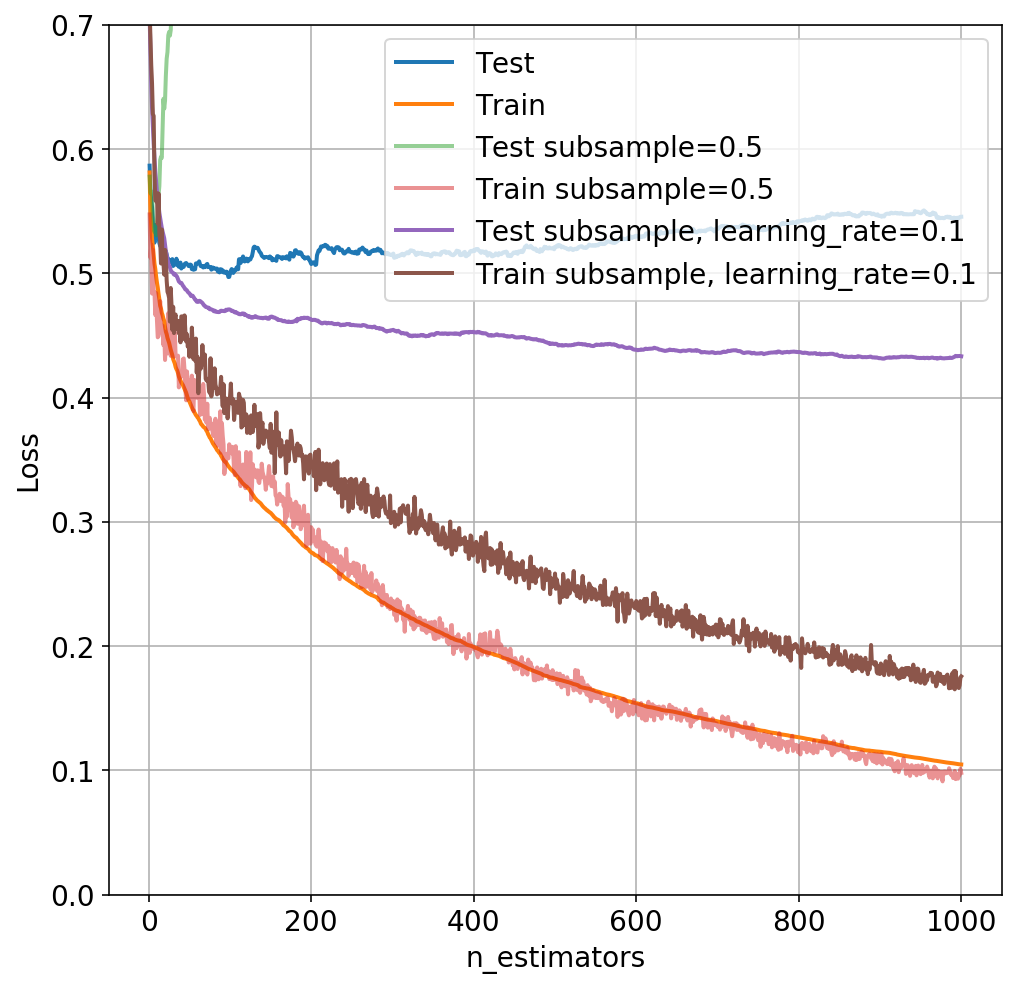

In [27]:
# Stochastic gradient descent
# Subsampling the training set before growing each tree (subsample)
# Subsampling the features before finding the best split node (max_features)
# Latter usually works better if there is a sufficient large number of features

ax = plt.gca()

clf = GradientBoostingRegressor(n_estimators=1000, max_depth=2, learning_rate=1.)
clf.fit(X_train, y_train)

_, ax = plot_loss(clf, X_test, y_test, ax=ax)


clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=1., subsample=0.5)
clf.fit(X_train, y_train)

_, ax = plot_loss(clf, X_test, y_test, ax=ax, alpha=0.5, label='subsample=0.5')

clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, subsample=0.5)
clf.fit(X_train, y_train)

_, ax = plot_loss(clf, X_test, y_test, ax=ax, label='subsample, learning_rate=0.1')

ax.legend(loc='best')
ax.grid()